In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8, 5)

In [4]:
# 加载 iris 数据库
iris_df = sns.load_dataset('iris')

URLError: <urlopen error [Errno 11004] getaddrinfo failed>

In [20]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
iris_df['species'].dtype

dtype('O')

In [22]:
# 类别型数据转化为数值型
iris_df['species'] = pd.Categorical(iris_df['species'])

In [23]:
iris_df['species'].dtype

CategoricalDtype(categories=['setosa', 'versicolor', 'virginica'], ordered=False)

In [24]:
# 查看原数据对应的类别值
iris_df['species'].cat.codes.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [25]:
# 将分类数值可视化为颜色，并丢弃特征列 'species'
iris_color = iris_df['species'].cat.codes
iris_df = iris_df.drop(labels=['species'], axis=1)

In [26]:
# 查看颜色
iris_color.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [27]:
# PCA 降到 3 维
pca = PCA(n_components = 3)
pca.fit(iris_df)

PCA(n_components=3)

In [28]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

In [29]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 ])

In [31]:
# 将 PCA 降维结果保存至 dataframe
res = pd.DataFrame(pca.transform(iris_df), columns=['PCA%i' % i for i in range(3)], index=iris_df.index)

In [32]:
# 查看结果的维度
res.shape

(150, 3)

<IPython.core.display.Javascript object>


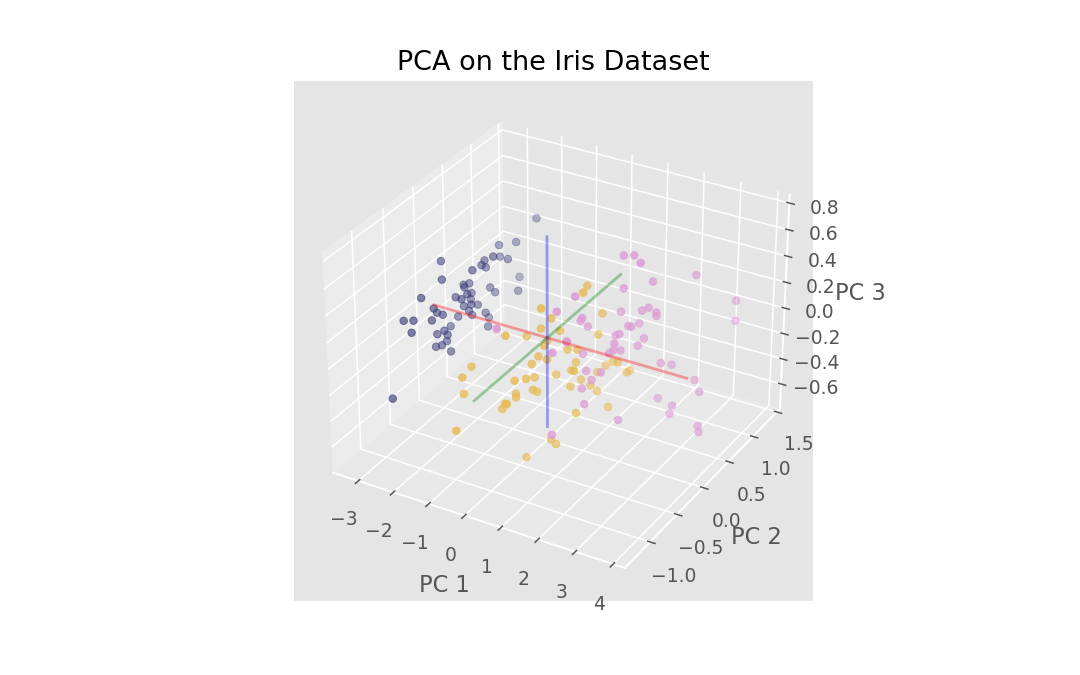

In [35]:
# 创建图形和图轴
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# 绘制降维后的数据散点图
ax.scatter(res['PCA0'], res['PCA1'], res['PCA2'], c=iris_color, cmap='tab20b', s=16)
 
# 绘制 xyz-坐标轴
x_Axis = ((min(res['PCA0']), max(res['PCA0'])), (0, 0), (0, 0))
ax.plot(x_Axis[0], x_Axis[1], x_Axis[2], 'r', alpha=0.35)
y_Axis = ((0, 0), (min(res['PCA1']), max(res['PCA1'])), (0, 0))
ax.plot(y_Axis[0], y_Axis[1], y_Axis[2], 'g', alpha=0.35)
z_Axis = ((0, 0), (0, 0), (min(res['PCA2']), max(res['PCA2'])))
ax.plot(z_Axis[0], z_Axis[1], z_Axis[2], 'b', alpha=0.35)
 
# xyz-轴标签
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

# 图题
ax.set_title('PCA on the Iris Dataset');

### 练习

1、使用 sklearn 将上面数据降维到 2 维并绘制。

2、使用 SVD 分解降维并绘制上面数据至 2 维。

#### 附录: 基于 SVD 的主成分分析

1、先对特征矩阵作奇异值分解 $\mathbf{X}=\mathbf{U} \mathbf{\Sigma V}^{\top}$。

2、新的特征矩阵可以这么计算，$\mathbf{Y}=\mathbf{XV}$。

3、请验证新特征矩阵 $\mathbf{Y}$ 的协方差矩阵 $\mathbf{Y}^{\top}\mathbf{Y}$ 是否为对角矩阵。

4、如果最终只想要 $k$ 个维度，那就只需要取 $\mathbf{V}$ 的前 $k$ 列，

$$
\mathbf{Y}=\mathbf{XV}_k=\mathbf{X}\left[\mathbf{v}_1\;,\mathbf{v}_2\;\!,\;\!\cdots\;\!,\;\!\mathbf{v}_k\right]
$$

这就是将 $\mathbf{XV}_k$ 的 $k$ 个列向量看成一组基，然后将原始的特征数据往这组基上投影，得到新的坐标。

5、由奇异值分解 $\mathbf{X}=\mathbf{U\Sigma V}^{\top}$，两边右乘 $\mathbf{V}$，得 $\mathbf{XV}=\mathbf{U} \mathbf{\Sigma}$。

这就是新坐标（新特征） $\mathbf{Y}$ 的另一种解释，即 $\mathbf{Y}=\mathbf{U} \mathbf{\Sigma}$。

新特征 $\mathbf{Y}$ 其实就是对左奇异向量的缩放，缩放因子就是相应的奇异值。

如果只取 $k$ 个维度，那就是

$$
\begin{array}{lll}
\mathbf{Y}&=\mathbf{U}_k \mathbf{\Sigma}_k\\[0.6em]&=\left[\mathbf{u}_1\;,\mathbf{u}_2\;\!,\;\!\cdots\;\!,\;\!\mathbf{u}_k\right]\mathbf{\Sigma}_k\\[0.6em]&=\left[\sigma_1\mathbf{u}_1\;,\sigma_2\mathbf{u}_2\;\!,\;\!\cdots\;\!,\;\!\sigma_k\mathbf{u}_k\right].
\end{array}
$$

#### 实现

In [36]:
import numpy as np
import seaborn as sns

In [37]:
iris = sns.load_dataset('iris')

In [38]:
X = iris.values[:,:-1]
X = X.astype(np.float64)

In [39]:
# 1、对特征矩阵零中心化
X -= np.mean(X, axis=0)

In [40]:
# 查看协方差矩阵
cov_XTX = X.T@X
cov_XTX

array([[102.16833333,  -6.32266667, 189.873     ,  76.92433333],
       [ -6.32266667,  28.30693333, -49.1188    , -18.12426667],
       [189.873     , -49.1188    , 464.3254    , 193.0458    ],
       [ 76.92433333, -18.12426667, 193.0458    ,  86.56993333]])

In [41]:
# 2、对特征矩阵进行 SVD 分解
U, Sigma, VT = np.linalg.svd(X, full_matrices=False)

In [42]:
# 3、计算新特征矩阵
Y = X@VT.T

In [43]:
# 查看新特征矩阵的协方差矩阵
cov_YTY = Y.T@Y
cov_YTY

array([[ 6.30008014e+02, -1.19017789e-13, -3.97316605e-14,
        -9.07924888e-14],
       [-1.19017789e-13,  3.61579414e+01,  2.58709068e-15,
         6.17354462e-15],
       [-3.97316605e-14,  2.58709068e-15,  1.16532155e+01,
        -2.42029738e-15],
       [-9.07924888e-14,  6.17354462e-15, -2.42029738e-15,
         3.55142885e+00]])

注意此时的协方差矩阵的

<IPython.core.display.Javascript object>


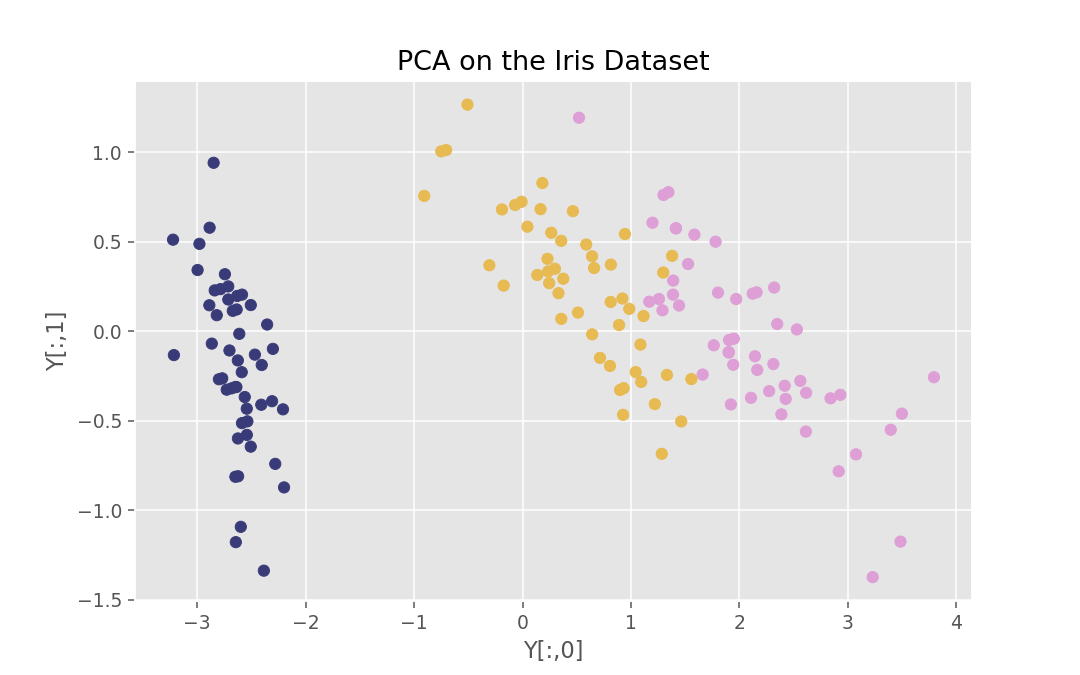

In [44]:
# 绘制

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

# 绘制降维后的数据散点图
ax.scatter(Y[:,0], Y[:,1], c=iris_color, cmap='tab20b', s=36)
 
# xy-轴标签
ax.set_xlabel('Y[:,0]')
ax.set_ylabel('Y[:,1]')

# 图题
ax.set_title('PCA on the Iris Dataset');

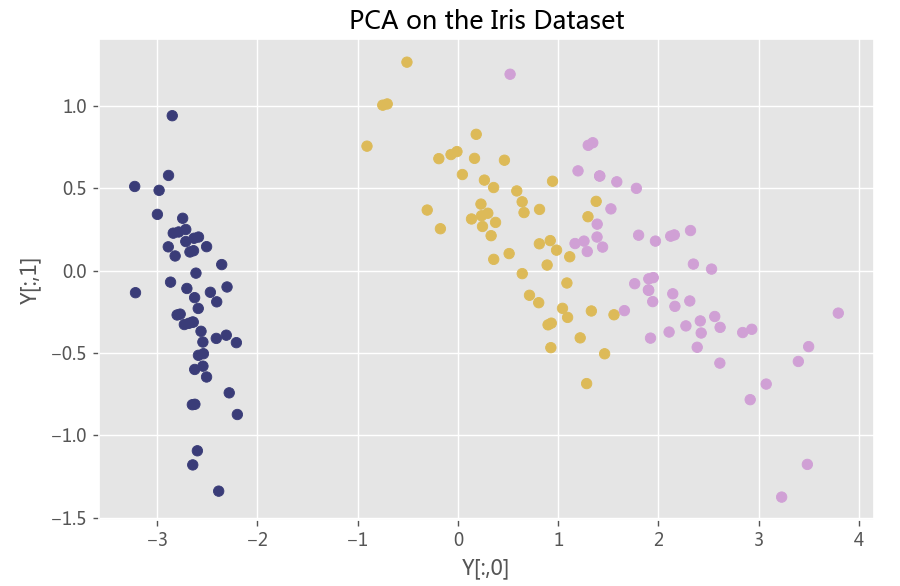

## colormap

https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html